# Stock Market Predictor for the SP500 index
This Stock Market Regressor project, employing Random Forests. It focuses on the prediction of the S&P 500 index, a key indicator of the financial market, using the powerful Random Forest algorithm. The code is meticulously crafted to showcase the complete regression workflow, from data collection and preprocessing to model training and evaluation. It demonstrates the capabilities of Random Forests in handling complex financial data, making it a valuable resource for those interested in quantitative finance, algorithmic trading, and machine learning in the context of stock market analysis. This project serves as both a practical reference for financial analysts and a learning tool for enthusiasts looking to harness the potential of machine learning in the realm of stock market forecasting. 

In [3]:

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns

Downloading the data from the package yfinance

In [4]:
sp500=yf.Ticker("^GSPC")
sp500=sp500.history(period='max')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,0.0,0.0
2023-10-19 00:00:00-04:00,4321.359863,4339.540039,4269.689941,4278.000000,3969730000,0.0,0.0
2023-10-20 00:00:00-04:00,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,0.0,0.0


Time Series data with DatetimeIndex

In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-10-11 00:00:00-04:00', '2023-10-12 00:00:00-04:00',
               '2023-10-13 00:00:00-04:00', '2023-10-16 00:00:00-04:00',
               '2023-10-17 00:00:00-04:00', '2023-10-18 00:00:00-04:00',
               '2023-10-19 00:00:00-04:00', '2023-10-20 00:00:00-04:00',
               '2023-10-23 00:00:00-04:00', '2023-10-24 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24069, freq=None)

Historical plot of the close values of the market since 1927.

<Axes: xlabel='Date'>

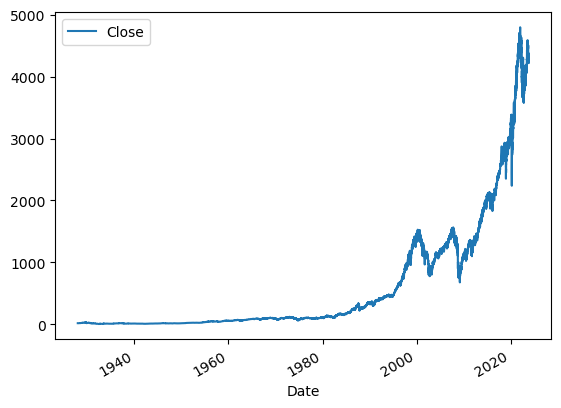

In [6]:
sp500.plot(y="Close",use_index=True)

We delete the Dividends and Stock Splits since we are interested in predicting the trends and not the values.

In [7]:
del sp500['Dividends']
del sp500['Stock Splits']

We create a new feature for out dataset that shows the value of the next day, this is to create a target value later.

In [8]:
sp500['Tomorrow']=sp500['Close'].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,4278.000000
2023-10-19 00:00:00-04:00,4321.359863,4339.540039,4269.689941,4278.000000,3969730000,4224.160156
2023-10-20 00:00:00-04:00,4273.850098,4276.560059,4223.029785,4224.160156,4004030000,4217.040039


Creating a Target feature which indicates as 1 if the price went up or 0 if the price went down

In [41]:
sp500['Target']=(sp500['Tomorrow']>sp500['Close']).astype(int)
sp500

C:\Users\tmara\AppData\Local\Temp\ipykernel_9340\4092833573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Target']=(sp500['Tomorrow']>sp500['Close']).astype(int)


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 00:00:00-04:00,4345.229980,4393.569824,4337.540039,4373.200195,3794850000,4314.600098,0,0.999951,1.0,1.002974,2.0,0.988713,28.0,1.051154,125.0,1.120703,530.0
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,4278.000000,0,0.993255,0.0,0.992372,1.0,0.976395,27.0,1.036452,125.0,1.105324,529.0
2023-10-19 00:00:00-04:00,4321.359863,4339.540039,4269.689941,4278.000000,3969730000,4224.160156,0,0.995741,0.0,0.987206,1.0,0.969168,27.0,1.027055,125.0,1.095600,529.0


Removing early data that may cause a major shift in the predictions, considering data just from 1990 since the trends have changed greatly.

In [12]:
sp500= sp500.loc["1990-01-01":].copy()
sp500

# Model Choice
Choosing random forest because it can pickup non-linear relationships.

In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)


RandomForestClassifier(min_samples_split=100, random_state=1)

Doing a simple Train/ Test split for demostration.

In [ ]:
train=sp500.iloc[:-100]
test= sp500.iloc[-100:]
predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train['Target'])

Importing metrics to analyse the accuracy results.

In [15]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])
preds=pd.Series(preds,index=test.index)
preds

Date
2023-06-02 00:00:00-04:00    1
2023-06-05 00:00:00-04:00    1
2023-06-06 00:00:00-04:00    1
2023-06-07 00:00:00-04:00    1
2023-06-08 00:00:00-04:00    1
                            ..
2023-10-18 00:00:00-04:00    1
2023-10-19 00:00:00-04:00    1
2023-10-20 00:00:00-04:00    1
2023-10-23 00:00:00-04:00    0
2023-10-24 00:00:00-04:00    0
Length: 100, dtype: int32

In [16]:
precision_score(test['Target'],preds)

0.5

In [17]:
combined=pd.concat([test['Target'],preds],axis=1)

<Axes: xlabel='Date'>

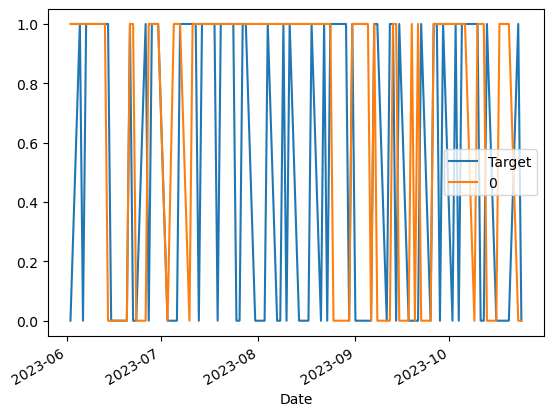

In [18]:
# Predictions as 0 and actual Target
combined.plot() 

# Backtesting Methodology
We use this approach to train and test over the last year at each iteration from the past 10 years. Taking start as 2500 which refers to 10 years back in the past and use 250 step to predict next year.

In [19]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds= model.predict(test[predictors]) 
    preds=pd.Series(preds,index=test.index,name='Predictions')
    combined=pd.concat([test['Target'],preds],axis=1)
    return combined
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [21]:
predictions=backtest(sp500,model,predictors)

In [22]:
predictions["Predictions"].value_counts()

Predictions
0    3441
1    2578
Name: count, dtype: int64

In [23]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5279286268425136

In [24]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.533311
0    0.466689
Name: count, dtype: float64

# Adding more feature predictors to the dataset
We do this by taking advantage of the time series indexing.
- Creating the rolling average over the last 2 days, week month, year and last 4 years.
- Shift forward the rolling sum of the target. Look at the sum of targets or if the stock went up.

In [25]:
horizons=[2,5,60,250,1000]
new_predictors=[]

for horizon in horizons:
    rolling_average=sp500.rolling(horizon).mean()
    ratio_column=f'Close_Ratio_{horizon}'
    sp500[ratio_column]=sp500['Close']/rolling_average['Close']

    trend_column=f'Trend_{horizon}'
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()['Target'] 
    new_predictors+=[ratio_column,trend_column]
sp500

Drop the years that are Nan beacuse of the forward shift rolling. The new dataset will start from 1993 now.

In [27]:
sp500=sp500.dropna()
sp500

# Improving the model

In [31]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)


We will also include probabilities in our predictions now. For the market to show an upward trend it must have 62% confidence. For this we update the predict function.

In [43]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'])
    preds= model.predict_proba(test[predictors])[:,1]
    preds[preds>=0.62]=1
    preds[preds<0.62]=0
    preds=pd.Series(preds,index=test.index,name='Predictions')
    combined=pd.concat([test['Target'],preds],axis=1)
    return combined

We run again the Backtest Methodology with the newly defined predict function.

In [33]:
predictions=backtest(sp500,model,new_predictors)
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-10-17 00:00:00-04:00,0,0.0
2023-10-18 00:00:00-04:00,0,0.0
2023-10-19 00:00:00-04:00,0,0.0


In [34]:
predictions["Predictions"].value_counts()

Predictions
0.0    4540
1.0     478
Name: count, dtype: int64

We calculate the precisiom scores for our new model methodology.

In [35]:
precision_score(predictions['Target'],predictions['Predictions'])

0.5878661087866108

We can see an increase in precision for the applied changes. The results show that the model could be improved. Some suggestions for further improvements are extracting more meaningful features that influence the Stock Market, such as news data, social media and different sources.